In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.constants import pi, g

In [2]:
LENGTH = 5. #string length
MASS = 1.  #mass
GRAVITY = g  #gravity acceleration
PI = pi  #pi
TIME_STEP = 0.01  # time step
TIME_FIRST = 0.  #first time
TIME_LAST = 2.  #last time
X_START = 3.  #first pos
Y_START = -4.  #last pos
T_START = MASS * GRAVITY * np.abs(Y_START) / LENGTH  #start tension

In [3]:
def pend_approx(x, y, u, v,
                string_tension,
                g=GRAVITY,
                string_length=LENGTH,
                m=MASS):
    dx = u
    dy = v
    du = -(string_tension * x) / (m * string_length)
    dv = -(string_tension * y) / (m * string_length) - g
    dT = -(3 * g * m * v) / string_length
    return np.array([dx, dy, du, dv, dT])


def runge_kutta4(t0=TIME_FIRST,
                 t=TIME_LAST,
                 h=TIME_STEP,
                 f=pend_approx):
    n = int((t - t0) / h)
    time = np.linspace(t0, t, n)

    gravity = g + 0.05 * np.sin(2 * PI * np.array(time))

    x = np.array([X_START] * n, np.float64)
    y = np.array([Y_START] * n, np.float64)
    u = np.array([.0] * n, np.float64)
    v = np.array([.0] * n, np.float64)
    T = np.array([T_START] * n, np.float64)

    for i in list(range(0, n - 1)):
        k11, k12, k13, k14, k15 = f(x[i],
                                    y[i],
                                    u[i],
                                    v[i],
                                    T[i],
                                    gravity[i])
        k21, k22, k23, k24, k25 = f(x[i] + h/2 * k11,
                                    y[i] + h/2 * k12,
                                    u[i] + h/2 * k13,
                                    v[i] + h/2 * k14,
                                    T[i] + h/2 * k15,
                                    gravity[i])
        k31, k32, k33, k34, k35 = f(x[i] + h/2 * k21,
                                    y[i] + h/2 * k22,
                                    u[i] + h/2 * k23,
                                    v[i] + h/2 * k24,
                                    T[i] + h/2 * k25,
                                    gravity[i])
        k41, k42, k43, k44, k45, = f(x[i] + k31 * h,
                                     y[i] + k32 * h,
                                     u[i] + k33 * h,
                                     v[i] + k34 * h,
                                     T[i] + k35 * h,
                                     gravity[i])
        x[1 + i] = x[i] + h/6 * (k11 + 2.0 * (k21 + k31) + k41)
        y[1 + i] = y[i] + h/6 * (k12 + 2.0 * (k22 + k32) + k42)
        u[1 + i] = u[i] + h/6 * (k13 + 2.0 * (k23 + k33) + k43)
        v[1 + i] = v[i] + h/6 * (k14 + 2.0 * (k24 + k34) + k44)
        T[1 + i] = T[i] + h/6 * (k15 + 2.0 * (k25 + k35) + k45)

    return x, y, u, v, T, n, time, gravity

In [4]:
def task(t0=TIME_FIRST, t=TIME_LAST, h=TIME_STEP):

    x, y, u, v, T, n, ts, gravity = runge_kutta4(t0, t, h, pend_approx)

    labels_x = ['x',
                't, с']
    labels_y = ['y',
                '$\\ \sqrt{x^2+y^2}$']
    graphics_x = [x, ts]
    graphics_y = [y, np.sqrt(x ** 2 + y ** 2)]

    num = 2
    fig_vis, axes = plt.subplots(nrows=num, ncols=1, constrained_layout=True)
    fig_vis.set_size_inches(num * 5, num * 5)
    axes = axes.flatten()

    colors = cm.hsv(np.linspace(0, 1, num * 4))

    for i, (lbl_x, lbl_y, ax, graph_x, graph_y) in enumerate(zip(labels_x, labels_y, axes, graphics_x, graphics_y)):
        fig_vis.suptitle('y(x) & L(t)', fontsize=28)
        ax.plot(graph_x, graph_y, markersize=5, color=colors[i * 2], alpha=1, linewidth=2)
        ax.set_xlabel(lbl_x, fontsize=18)
        ax.set_ylabel(lbl_y, fontsize=18)
        plt.gcf().set_dpi(100)
        ax.ticklabel_format(useOffset=False)
        plt.plot()

    ################################
    labels_y = ['x, м',
                'y, м',
                'vx, $\\frac{m}{s}$',
                'vy, $\\frac{m}{s}$']
    graphics = [x, y, u, v]

    fig_vis, axes = plt.subplots(nrows=num, ncols=num, constrained_layout=True)
    fig_vis.set_size_inches(num * 8, num * 5)
    axes = axes.flatten()

    for i, (label, ax, graph) in enumerate(zip(labels_y, axes, graphics)):
        fig_vis.suptitle('x(t), y(t) & vx(t), vy(t)', fontsize=28)
        ax.plot(ts, graph, markersize=5, color=colors[i * 2], alpha=1, linewidth=2)
        ax.set_xlabel("t, с", fontsize=18)
        ax.set_ylabel(label, fontsize=18)
        plt.gcf().set_dpi(100)
        plt.plot()

    ################################
    labels_y = ['$\\ g + 0.05 \cdot \sin(2 \cdot \pi \cdot t)$',
                '$\\ T$']
    graphics_y = [gravity, T]

    fig_vis, axes = plt.subplots(nrows=1, ncols=num, constrained_layout=True)
    fig_vis.set_size_inches(num * 8, num * 3)
    axes = axes.flatten()

    colors = cm.hsv(np.linspace(0, 1, num * 4))

    for i, (lbl_y, ax, graph_y) in enumerate(zip(labels_y, axes, graphics_y)):
        fig_vis.suptitle('g(t) & T(t)', fontsize=28)
        ax.plot(ts, graph_y, markersize=5, color=colors[i * 2], alpha=1, linewidth=2)
        ax.set_xlabel('t, с', fontsize=18)
        ax.set_ylabel(lbl_y, fontsize=18)
        plt.gcf().set_dpi(100)
        ax.ticklabel_format(useOffset=False)
        plt.plot()

## На интервале [0; 2].

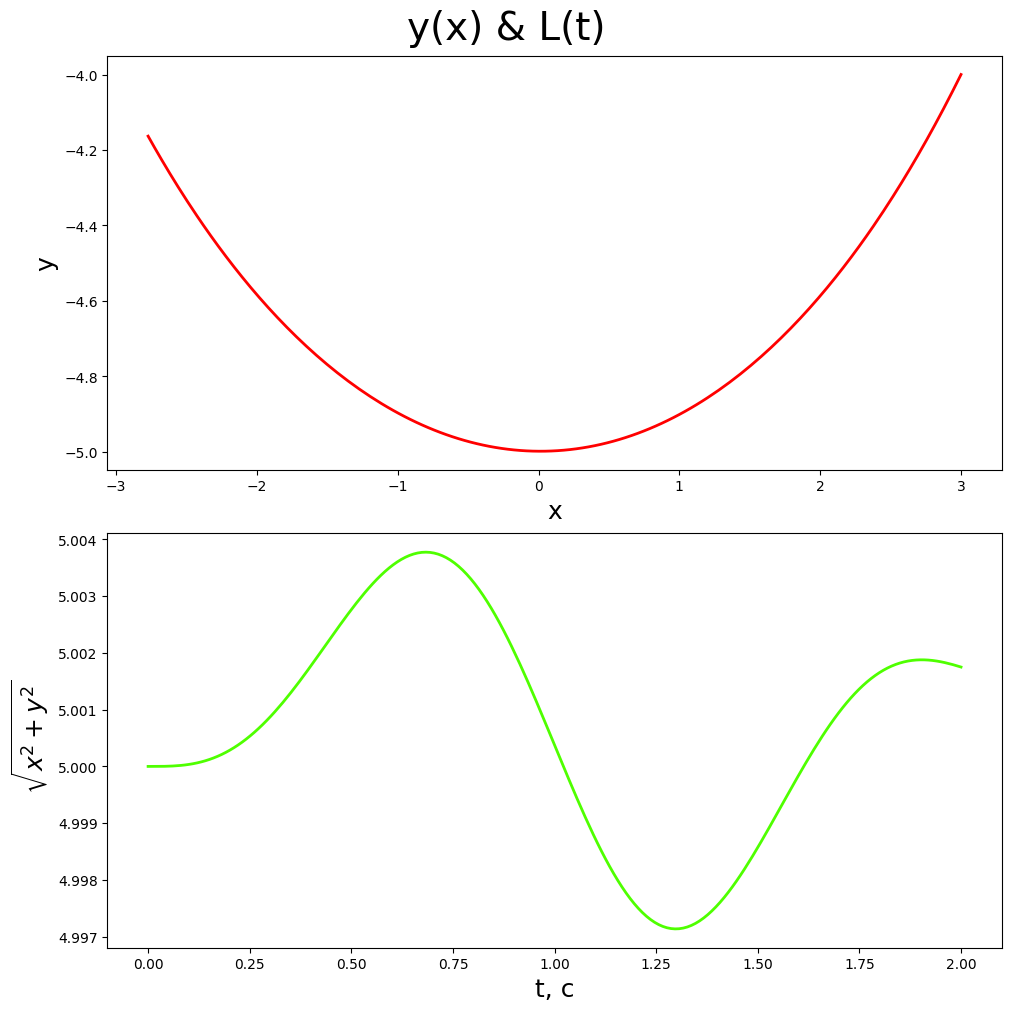

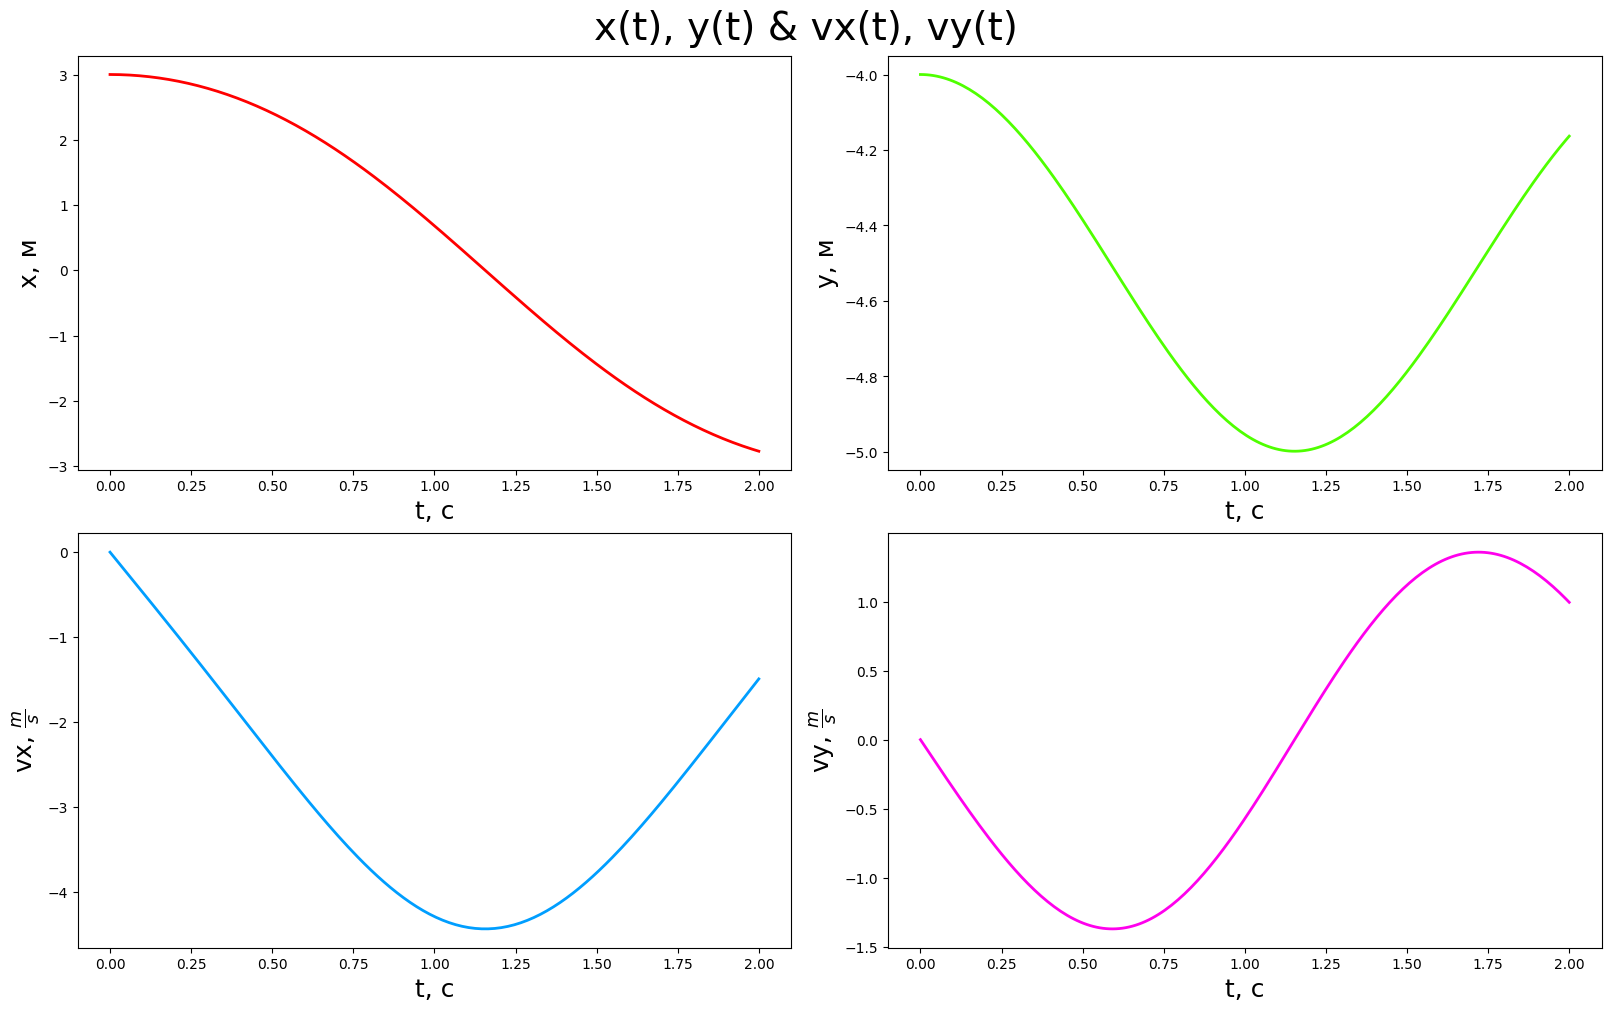

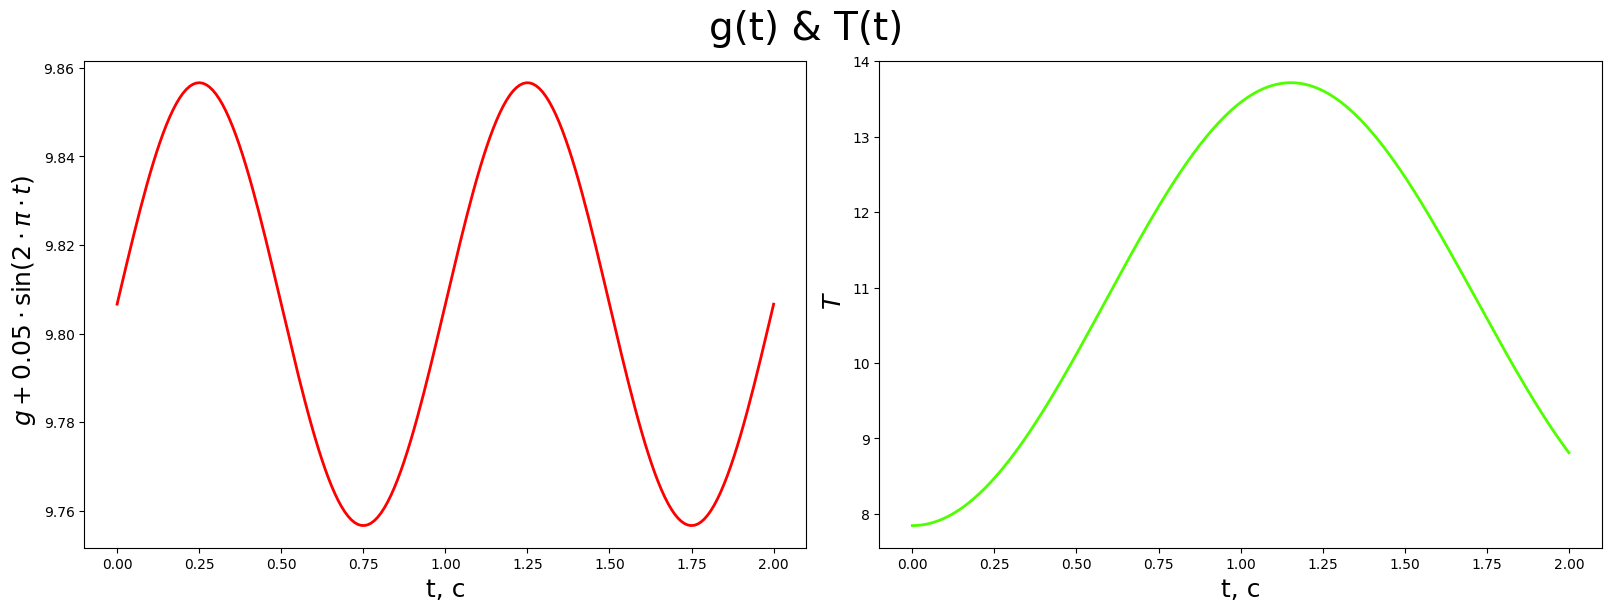

In [5]:
task(0., 2., 1e-2)

## На интервале [0; 100].

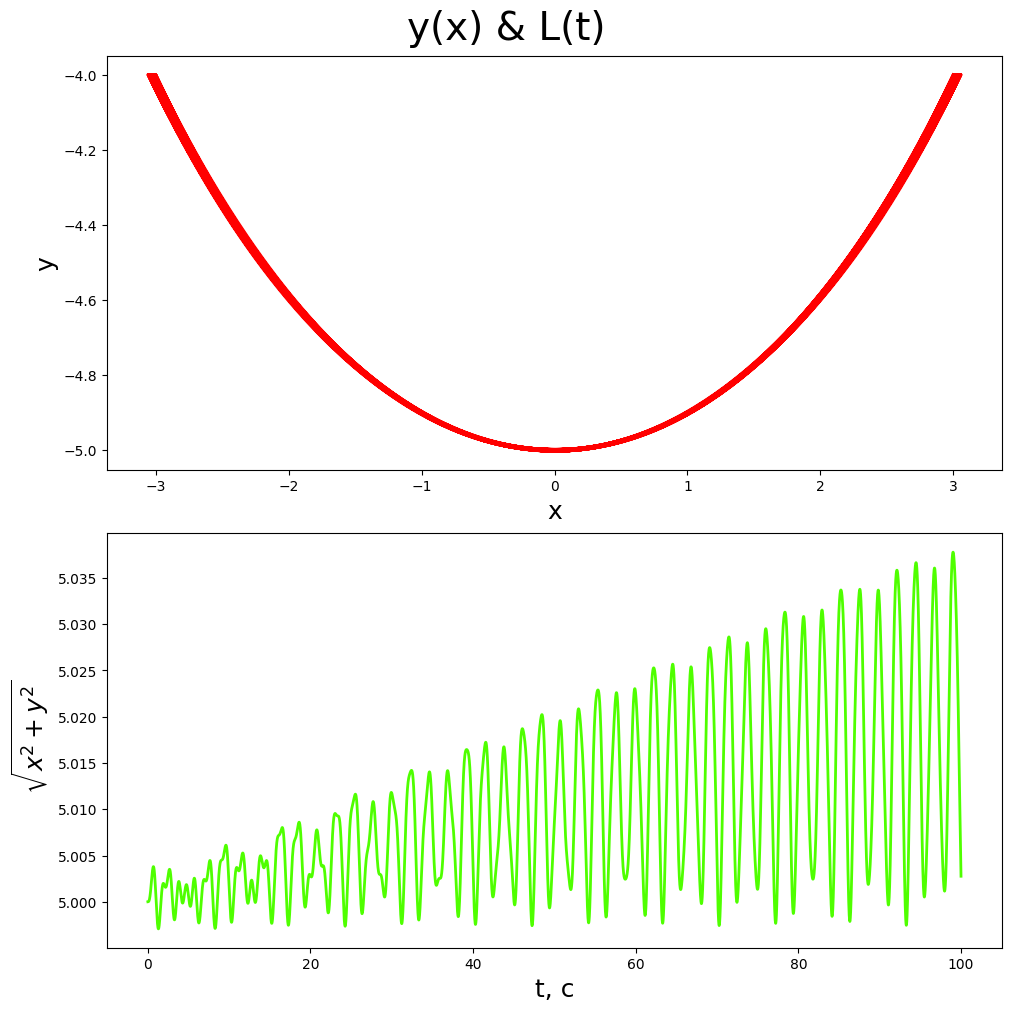

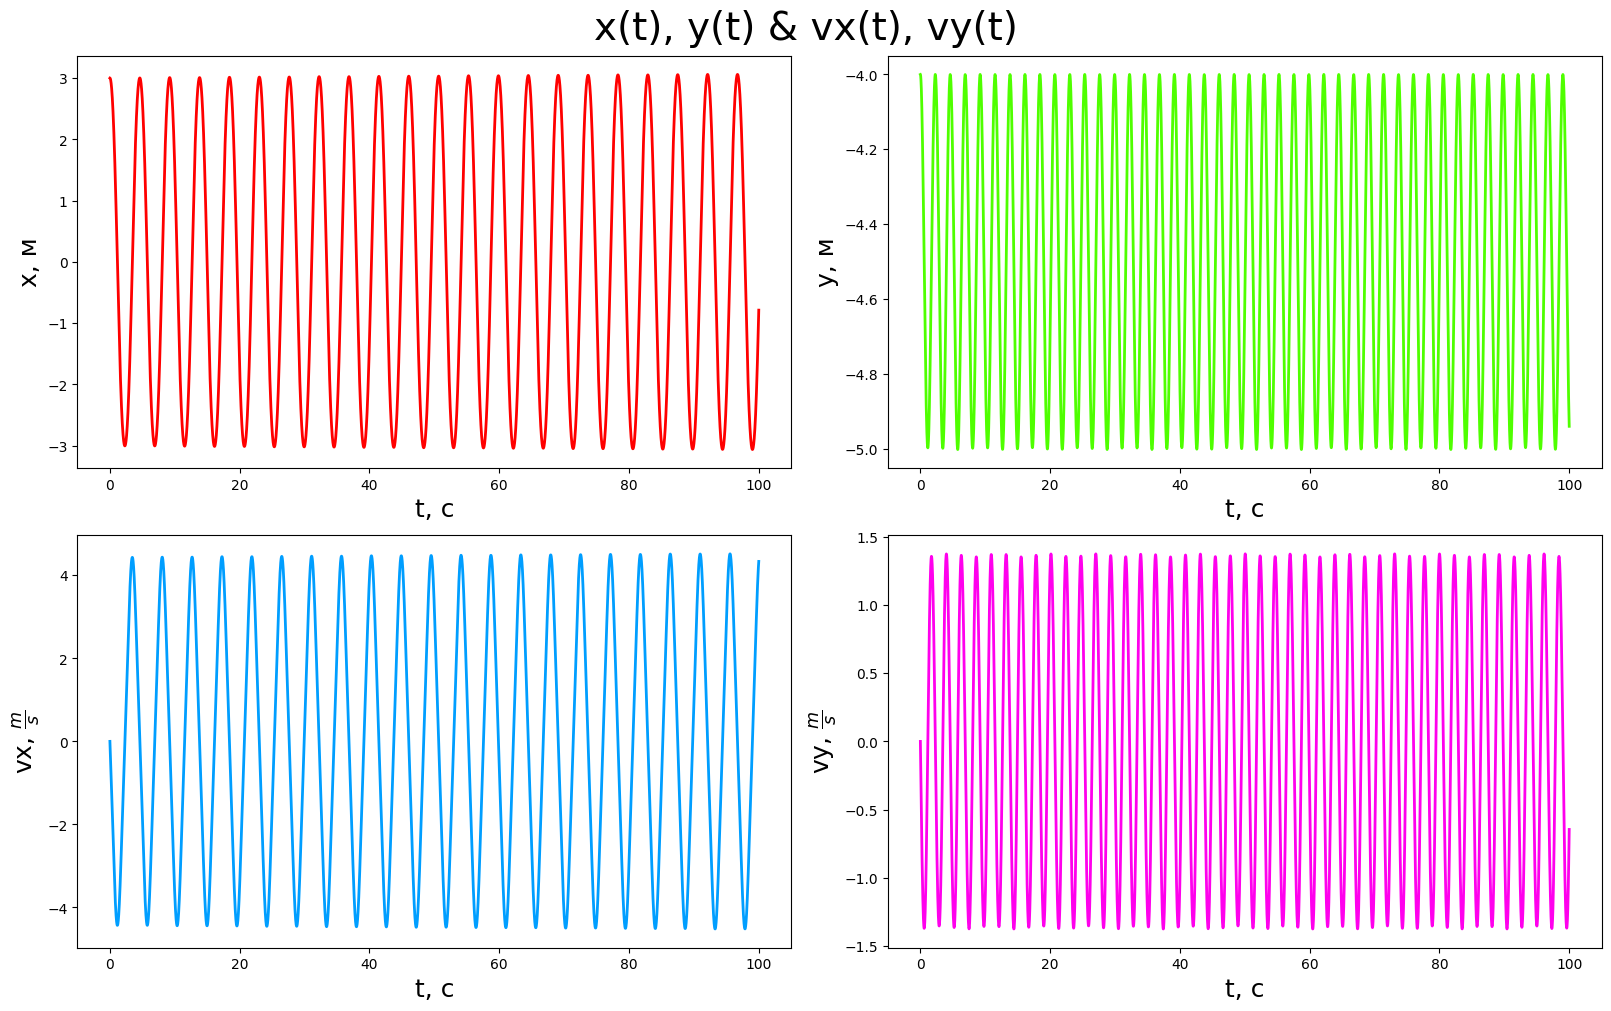

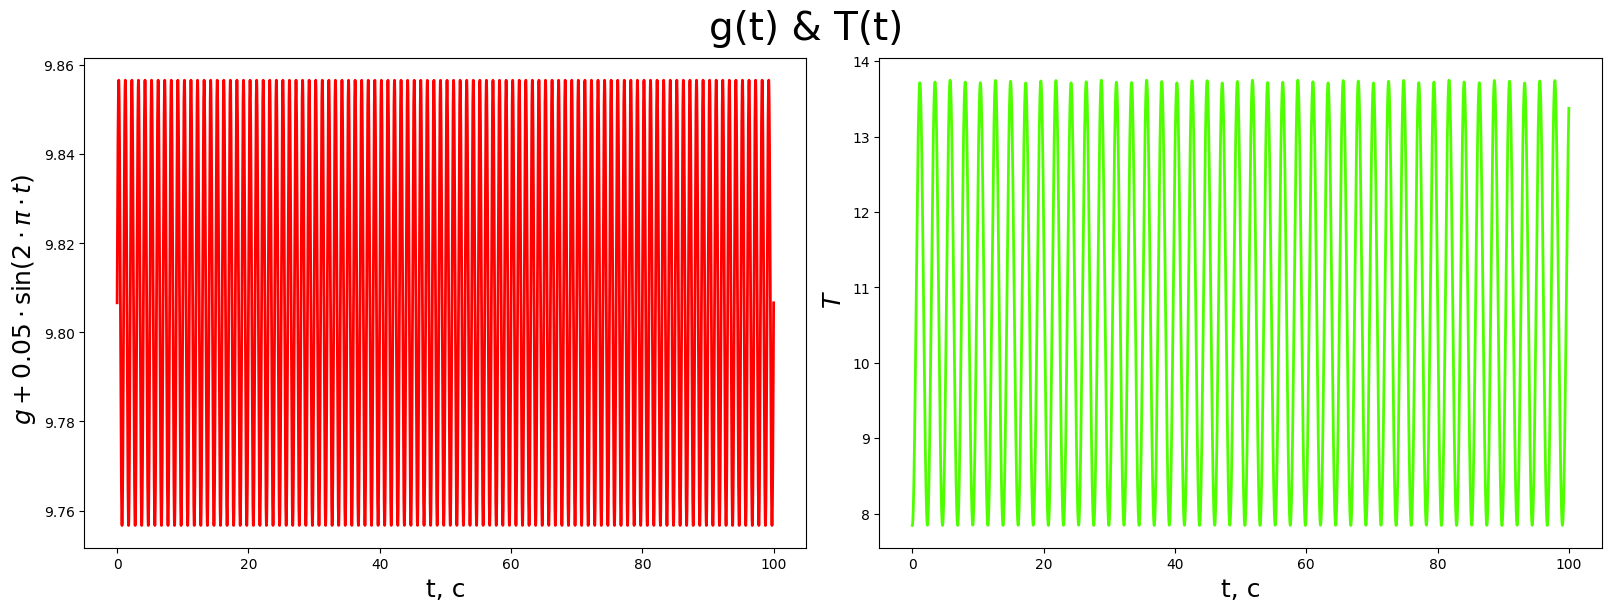

In [6]:
task(0., 100., 1e-2)
